# Week2- Assignment 1  - Sanjivek

### Les Miserable: coappearance network of characters in the novel Les Miserables. 
#### Dataset compiled by D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993). 

#### This dataset help us to provide the info on all characters of Les Miserable and their connections, we will work through this and try to identify top 10 central characters and their connected netwrok graph.

In [17]:
import math
import networkx as nx
import matplotlib.pyplot as plt


In [18]:
L=nx.read_gml('lesmis.gml',relabel=True)
L

In [19]:
print "Nodes:", L.number_of_nodes()
print "Edges:", L.number_of_edges()

Nodes: 77
Edges: 254


#### With 77 nodes and 254 edges, lets draw a network grapgh using spring layout 

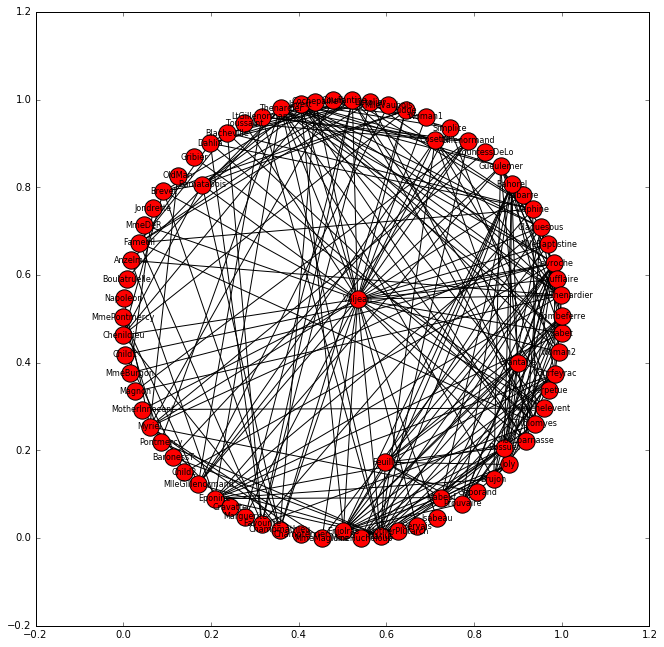

In [20]:
%matplotlib inline
plt.figure(figsize=(11,11))
default_distance_between_nodes = 1.0/(math.sqrt(len(L.nodes())))
pos = nx.spring_layout(L,scale=1.0,k=5*default_distance_between_nodes)
nx.draw_networkx(L,pos, node_size=300, font_size=8)


#### With all the edges and nodes the network graph looks really complicated, and this will not help in drawing any insight on key characters and their connection to others. So let's find out the betweenness centarlity of characters of all nodes and created a sorted list of nodes, from highest centrality to lowest, and then list top 10 central  characters.

In [21]:
M = nx.betweenness_centrality(L)
SL = M.items()
SL.sort(key=lambda x:x[1],reverse=True)
top_chars = SL[:10]
SL

[(u'Valjean', 0.5699890527836183),
 (u'Myriel', 0.17684210526315788),
 (u'Gavroche', 0.16511250242584766),
 (u'Marius', 0.13203248862194603),
 (u'Fantine', 0.1296445409881942),
 (u'Thenardier', 0.07490122123424223),
 (u'Javert', 0.05433155966478437),
 (u'MlleGillenormand', 0.047598927875243655),
 (u'Enjolras', 0.0425533568221771),
 (u'Tholomyes', 0.040629348177335795),
 (u'Bossuet', 0.030753650179957827),
 (u'MmeThenardier', 0.029002418730461735),
 (u'Mabeuf', 0.027661236424394314),
 (u'Fauchelevent', 0.026491228070175437),
 (u'MmeBurgon', 0.02631578947368421),
 (u'Cosette', 0.023796253454148188),
 (u'Gillenormand', 0.02021062158319776),
 (u'Eponine', 0.011487550654163006),
 (u'Simplice', 0.008640295033483887),
 (u'Bamatabois', 0.00804093567251462),
 (u'Pontmercy', 0.006925438596491227),
 (u'Courfeyrac', 0.00526702988198833),
 (u'Babet', 0.004960383978389519),
 (u'Gueulemer', 0.004960383978389519),
 (u'Claquesous', 0.004861804195599211),
 (u'Montparnasse', 0.003873829873829876),
 (u'Jo

In [22]:
top_chars

[(u'Valjean', 0.5699890527836183),
 (u'Myriel', 0.17684210526315788),
 (u'Gavroche', 0.16511250242584766),
 (u'Marius', 0.13203248862194603),
 (u'Fantine', 0.1296445409881942),
 (u'Thenardier', 0.07490122123424223),
 (u'Javert', 0.05433155966478437),
 (u'MlleGillenormand', 0.047598927875243655),
 (u'Enjolras', 0.0425533568221771),
 (u'Tholomyes', 0.040629348177335795)]

#### Now we have top 10 central characters and we can easily draw a network grapgh of these characters, For this We're only going to label subset of the nodes in the final graph (the top characters). To do that, we're going to create a dictionary of the nodes we're interested in. It's going to map nodes to the labels we want to use. But the nodes are already represented by the labels we're interested in, because we read them in with relabel=True. So our new_labels dictionary is just going to map a node to itself.

In [23]:
new_labels = dict((k,k) for (k,v) in top_chars)
default_distance_between_nodes = 1.0/(math.sqrt(len(L.nodes())))

In [24]:
new_labels

{u'Enjolras': u'Enjolras',
 u'Fantine': u'Fantine',
 u'Gavroche': u'Gavroche',
 u'Javert': u'Javert',
 u'Marius': u'Marius',
 u'MlleGillenormand': u'MlleGillenormand',
 u'Myriel': u'Myriel',
 u'Thenardier': u'Thenardier',
 u'Tholomyes': u'Tholomyes',
 u'Valjean': u'Valjean'}

#### It's interesting to found that when we tried creating new labels for the top 10 central characters they are showing here as connected to themselves, lets see how it will look like when we see the complete grapgh of all top 10 characters connected with others.

{u'Enjolras': <matplotlib.text.Text at 0x85a2668>,
 u'Fantine': <matplotlib.text.Text at 0x8756c18>,
 u'Gavroche': <matplotlib.text.Text at 0x8756eb8>,
 u'Javert': <matplotlib.text.Text at 0x85a2a20>,
 u'Marius': <matplotlib.text.Text at 0x85afba8>,
 u'MlleGillenormand': <matplotlib.text.Text at 0x85af438>,
 u'Myriel': <matplotlib.text.Text at 0x85a22b0>,
 u'Thenardier': <matplotlib.text.Text at 0x85af7f0>,
 u'Tholomyes': <matplotlib.text.Text at 0x8756240>,
 u'Valjean': <matplotlib.text.Text at 0x85a2dd8>}

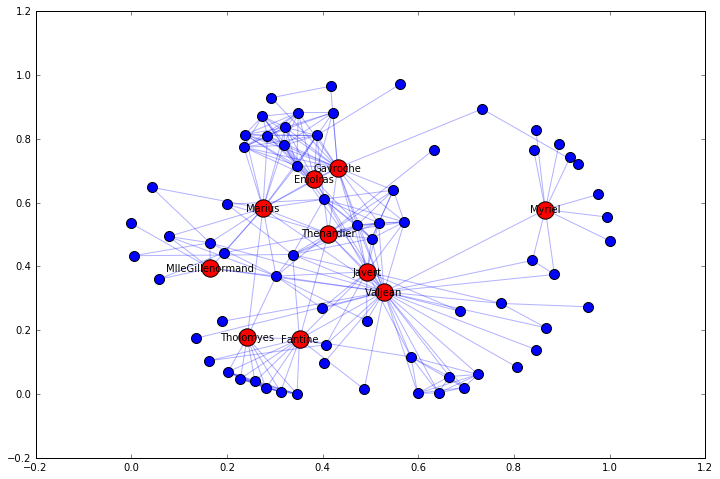

In [25]:
%matplotlib inline
plt.figure(figsize=(12,8))
pos = nx.spring_layout(L,scale=1.0)
default_distance_between_nodes = 1.0/(math.sqrt(len(L.nodes())))
nx.draw_networkx_edges(L,pos, edge_color='blue',alpha=.3)  
nx.draw_networkx_nodes(L,pos,node_color='blue',node_size=100)
nx.draw_networkx_nodes(L,pos,new_labels,node_color='red',node_size=300)
nx.draw_networkx_labels(L,pos,new_labels,font_size=10,font_color='black')

#### With this new visualization we can very well understand the top 10 central characters of the Les Miserable play and how they are connected with each other. draw_networkx_edges, draw_networkx_nodes and draw_networkx_label helps to work in the refined dataset and help to cut the noise. 

In [26]:
from networkx import algorithms
algorithms.average_shortest_path_length(L)

2.6411483253588517